<a href="https://colab.research.google.com/github/ScripterX-00/diabetes-prediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install joblib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
data=pd.read_csv("/content/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

<Axes: >

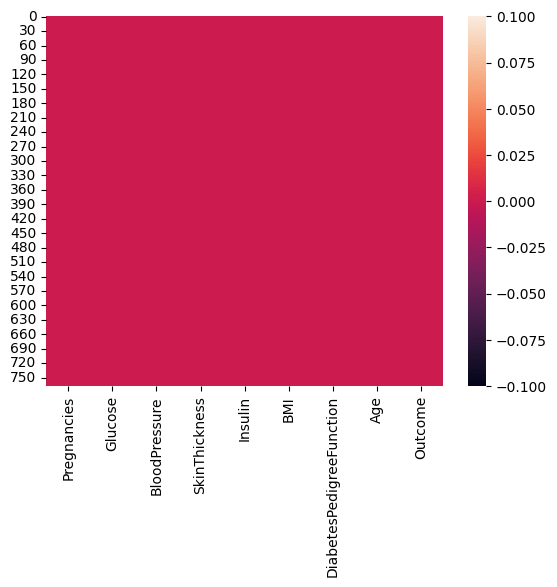

In [ ]:
sns.heatmap(data.isnull())

<Axes: xlabel='Outcome', ylabel='count'>

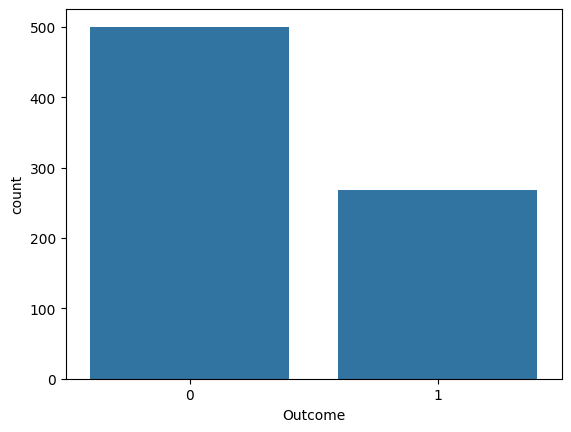

In [ ]:
sns.countplot(data=data,x="Outcome")

In [ ]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

<Axes: >

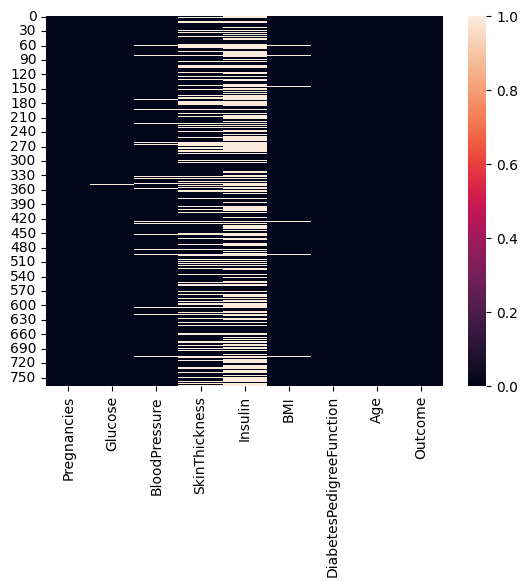

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)

<ipython-input-11-d4df560d3136>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
<ipython-input-11-d4df560d3136>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

<Axes: >

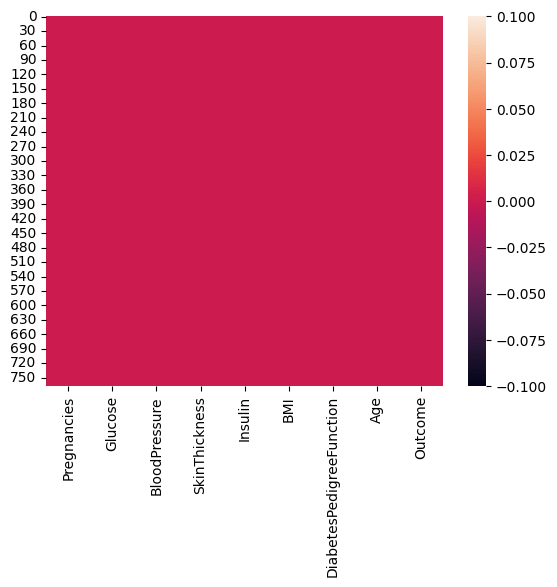

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [ ]:
data=data.drop(["Pregnancies","DiabetesPedigreeFunction","Age"],axis=1)

In [ ]:
print(data)

     Glucose  BloodPressure  SkinThickness     Insulin   BMI  Outcome
0      148.0           72.0       35.00000  155.548223  33.6        1
1       85.0           66.0       29.00000  155.548223  26.6        0
2      183.0           64.0       29.15342  155.548223  23.3        1
3       89.0           66.0       23.00000   94.000000  28.1        0
4      137.0           40.0       35.00000  168.000000  43.1        1
..       ...            ...            ...         ...   ...      ...
763    101.0           76.0       48.00000  180.000000  32.9        0
764    122.0           70.0       27.00000  155.548223  36.8        0
765    121.0           72.0       23.00000  112.000000  26.2        0
766    126.0           60.0       29.15342  155.548223  30.1        1
767     93.0           70.0       31.00000  155.548223  30.4        0

[768 rows x 6 columns]


In [ ]:
#sns.pairplot(data,hue="Outcome")

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1]
print(x)

[[148.          72.          35.         155.54822335  33.6       ]
 [ 85.          66.          29.         155.54822335  26.6       ]
 [183.          64.          29.15341959 155.54822335  23.3       ]
 ...
 [121.          72.          23.         112.          26.2       ]
 [126.          60.          29.15341959 155.54822335  30.1       ]
 [ 93.          70.          31.         155.54822335  30.4       ]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
from sklearn.svm import SVC
svm_model=SVC(kernel="linear")
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
yp=svm_model.predict(x_test)

In [ ]:
yp=svm_model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)


              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.58      0.46      0.51        48

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.71      0.73      0.72       154



In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yp=svm_model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.58      0.46      0.51        48

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.71      0.73      0.72       154



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_final=KNeighborsClassifier(n_neighbors=5)
model_final.fit(x,y)

KNeighborsClassifier()

In [ ]:
yp=model_final.predict([[148,72,35,155,33.6]])
print(yp[0])

1


In [ ]:
yp=model_final.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       106
           1       0.81      0.52      0.63        48

    accuracy                           0.81       154
   macro avg       0.81      0.73      0.75       154
weighted avg       0.81      0.81      0.80       154



In [ ]:
yp=svm_model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.58      0.46      0.51        48

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.71      0.73      0.72       154



In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
yp=svm_model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,yp)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.58      0.46      0.51        48

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.71      0.73      0.72       154



In [ ]:
joblib.dump(model_final,"dp.joblib")

['dp.joblib']